# Delaunay Lowerstar filtrations

This filtration was introduced by [[Delaunay Bifiltrations of Functions on Point Clouds, Alonso et al]](https://doi.org/10.1137/1.9781611977912.173), whose code is available [here](https://bitbucket.org/mkerber/function_delaunay).

This bifiltration is very similar to the RipsLowerstar multifiltrations, and is more adapted to low-dimensional Euclidean data.

## Definition

Let $X$ be a point cloud in $\mathbb R^n$, and $f\colon X\to \mathbb R$.

The CěchLowerstar bifiltration $F$ of the point cloud $X$ , with lowerstar function $f$ is the bifiltration over $\mathbb R_+\times \mathbb R$, given by:


\begin{align*}
\forall (r,d)\in \mathbb R_+\times \mathbb R,\quad&
F_{r,d} := \bigcup_{\substack{x\in X \\ f(x)\le d}} B(x,r)
\end{align*}


The DelaunayLowerstar bifiltration is a 1-critical bifiltration that is topologically equivalent to this one.

## An example

In [1]:
import multipers as mp
import matplotlib.pyplot as plt

[KeOps] Warning : CUDA libraries not found or could not be loaded; Switching to CPU only.


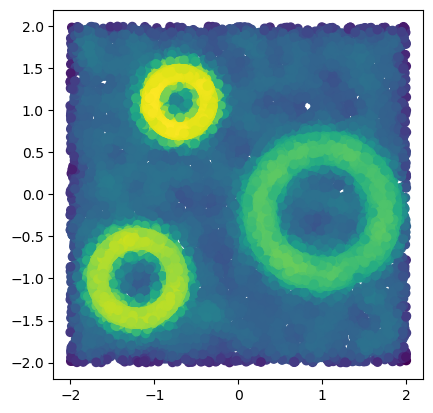

In [2]:
x = mp.data.three_annulus(10_000, 10_000)
f = - mp.filtrations.density.KDE(bandwidth=.1, return_log=True).fit(x).score_samples(x)
plt.scatter(*x.T, c = -f)
plt.gca().set_aspect(1)

The bifiltration can then be obtained by:

In [3]:
s = mp.filtrations.DelaunayLowerstar(points=x, function=f)

If only a given homological degree is necessary, this construction can made faster:

In [4]:
s = mp.filtrations.DelaunayLowerstar(points=x, function=f, reduce_degree=1)

/var/folders/w6/5k5w13s94bq0dfsx2xzqxcsh0000gn/T/ipykernel_8190/1891258844.py:1: UserWarning: (copy warning) Got a non-vine slicer as an input. Use `vineyard=True` to remove this copy.
  mp.module_approximation(s).plot()


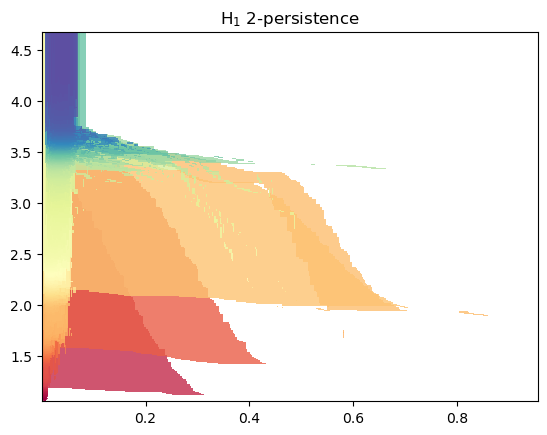

In [5]:
mp.module_approximation(s).plot()

## Autodiff

This bifiltration is not autodiff per se, but can be *weakenned* into a flag complex to be autodiff w.r.t. the initial point cloud, and the function $f$.

The gradient is only guaranteed almost everywhere, by [[Differentiability and Optimization of Multiparameter Persistent Homology]](https://proceedings.mlr.press/v235/scoccola24a.html).

In [6]:
import torch
y = torch.from_numpy(x).requires_grad_(True)
f = - mp.filtrations.density.KDE(bandwidth=.1, return_log=True).fit(y).score_samples(y)

st = mp.filtrations.DelaunayLowerstar(points=y, function=f, flagify=True)

Non-problematic operations should preserve gradient 

In [7]:
s = mp.Slicer(st).minpres(1)

and invariants should preserve the gradient as well.

True

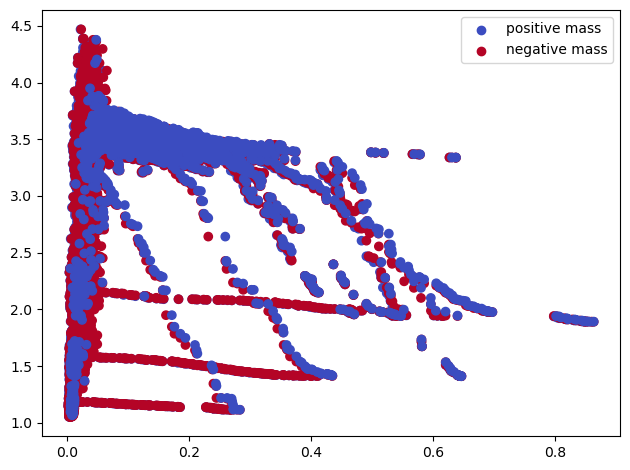

In [8]:
(pts,w), = mp.signed_measure(
    s,
    degree=1, 
    invariant="hilbert",
    plot=True
)
pts.requires_grad # Should be True